In [1]:
import numpy as np

In [2]:
a = 1 + 1j
b = 1 - 1j

In [3]:
x = np.array([a, b])

In [4]:
def normalize(vector):
    def coeffLength(coeff):
        return np.real(coeff*np.conj(coeff))
    def totalLength():
        sum = 0
        for i in vector:
            sum += coeffLength(i)
        return sum**(0.5)
    totalSum = np.array(totalLength())
    return vector/totalSum

In [5]:
normalize(x)

array([0.5+0.5j, 0.5-0.5j])

In [6]:
#inner product, #outerproduct

In [7]:
def inner(A, B):
    return A*np.matrix(B).getH()

In [8]:
inner(x, x)

matrix([[4.+0.j]])

In [9]:
def outer(A, B):
    return np.outer(A, B)

In [10]:
outer(x, x)

array([[0.+2.j, 2.+0.j],
       [2.+0.j, 0.-2.j]])

In [11]:
#linearly indep orthogonal

In [12]:
matrix = np.array(
    [
        [0, 1 ,5 ,20],
        [3, 0, 4, 15],
        [0, 1, 9, 36],
        [1, 7, 0, 0]
    ])

In [13]:
vectorA = np.array([1, 1j])
vectorB = np.array([1j, 1])

In [14]:
def isLinIndep(M):
    return (M.shape[1] == np.linalg.matrix_rank(M))

In [15]:
isLinIndep(matrix)

True

In [16]:
def isOrtho(A, B):
    return (inner(A, B) == 0)

In [17]:
isOrtho(vectorA, vectorB)

matrix([[ True]])

In [18]:
#unitary, kroneckor product

In [28]:
M = np.array(
    [
        [1/sqrt(2), 1/sqrt(2)],
        [1/sqrt(2), -1/sqrt(2)],
    ])

In [29]:
def isUnitary(M):
    return np.allclose(np.eye(M.shape[0]), np.matrix(M).getH()*M)

In [30]:
isUnitary(M)

True

In [31]:
np.outer(M, M)

array([[ 0.5,  0.5,  0.5, -0.5],
       [ 0.5,  0.5,  0.5, -0.5],
       [ 0.5,  0.5,  0.5, -0.5],
       [-0.5, -0.5, -0.5,  0.5]])

In [32]:
def tensordot(A, B):
    return np.kron(A, B)

In [33]:
tensordot(M, M)

array([[ 0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5]])

In [34]:
from qiskit import *
%matplotlib inline
from math import pi, sqrt

In [35]:
circ = QuantumCircuit(2)

In [36]:
circ.h(0)

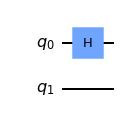

In [37]:
circ.draw('mpl')

In [38]:
backend = Aer.get_backend('statevector_simulator')
result = execute(circ, backend).result()
output = result.get_statevector(circ, decimals=3)

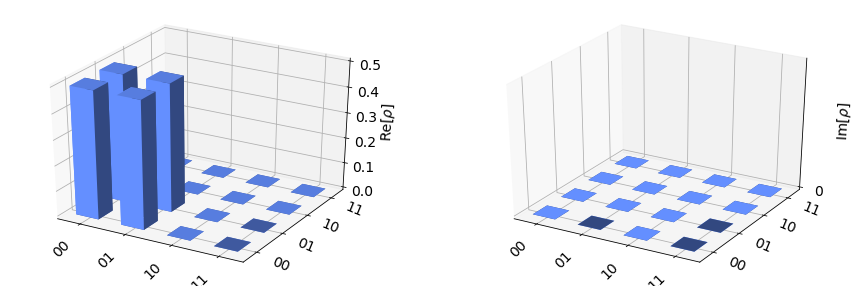

In [39]:
visualization.plot_state_city(output)

In [40]:
circ2 = QuantumCircuit(6)

In [41]:
circ2.h(1)
circ2.x(2)
circ2.y(3)
circ2.h(4)
circ2.z(4)
circ2.h(5)
circ2.rz(pi/4, 5)

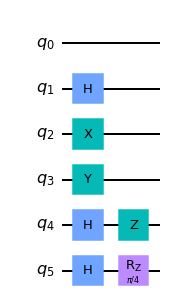

In [42]:
circ2.draw('mpl')

In [43]:
qobj = assemble(circ2)
state = backend.run(qobj).result().get_statevector()

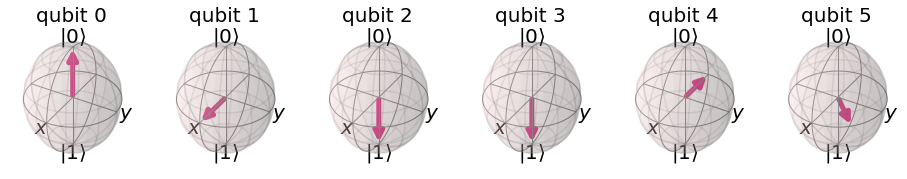

In [44]:
visualization.plot_bloch_multivector(state)

In [45]:
#Random Number Generator from 1 to 64

In [46]:
circ3 = QuantumCircuit(6, 6)

In [47]:
for i in range(0, 6):
    circ3.h(i)
    circ3.measure(i, i)

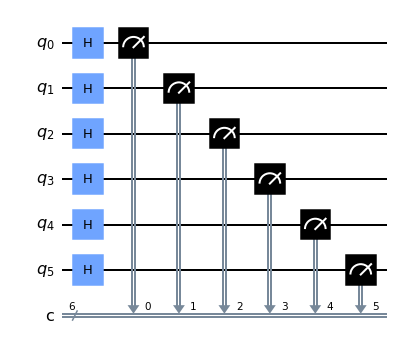

In [48]:
circ3.draw('mpl')

In [49]:
measures = []
for j in range(0, 10):
    outcome = execute(circ3, backend).result()
    hist = outcome.get_counts()
    for i in hist.keys():
        measures.append(int(i, 2))

In [50]:
measures

[35, 8, 17, 27, 57, 45, 19, 13, 54, 48]

In [51]:
#eigenvalues, eigenvectors

In [52]:
M = np.array(
    [
        [47, 13, -34],
        [-41, 4, 0],
        [28, 58, 41],
    ])

In [53]:
def get_eigenvals(M):
    return np.linalg.eigvals(M)

In [54]:
get_eigenvals(M)

array([15.50432174+40.4024353j, 15.50432174-40.4024353j,
       60.99135652 +0.j       ])

In [55]:
def get_eigenvectors(M):
    w, v = np.linalg.eig(M)
    return v

In [56]:
vectors = get_eigenvectors(M)

In [57]:
vectors[:,2].reshape(3, 1)

array([[-0.70907074+0.j],
       [ 0.5101107 +0.j],
       [ 0.48683237+0.j]])

In [58]:
#projection, svd

In [59]:
V = np.array(
    [
        [1/sqrt(2), 1/sqrt(2), 1/sqrt(2), 1/sqrt(2)],
    ])

In [60]:
axes = []
axes.append(np.array(
    [
        [1, 0, 0, 0],
    ]))
axes.append(np.array(
    [
        [0, 1, 0, 0],
    ]))
axes.append(np.array(
    [
        [0, 0, 1, 0],
    ]))
axes.append(np.array(
    [
        [0, 0, 0, 1],
    ]))

In [61]:
def proj(V, axis):
    return np.dot(V, np.dot(outer(axis, axis), np.transpose(V)))

In [62]:
proj(V, axes[0])

array([[0.5]])

In [63]:
length = 0
for i in axes:
    length += proj(V, i)
length = sqrt(length)

In [64]:
length

1.414213562373095

In [65]:
#svd

In [66]:
M = np.array(
    [
        [47, 13, -34],
        [-41, 4, 0],
        [28, 58, 41],
    ])

In [67]:
def svd(M):
    return np.linalg.svd(M)

In [68]:
P, Q, R = svd(M)

In [69]:
def postQ(Q):
    Q2 = np.zeros([3, 3])
    Q2[:3, :3] = np.diag(Q)
    return Q2

In [70]:
postQ(Q)

array([[80.5396182 ,  0.        ,  0.        ],
       [ 0.        , 63.87851761,  0.        ],
       [ 0.        ,  0.        , 22.20146139]])

In [71]:
M2 = np.dot(P, np.dot(postQ(Q), R))

In [72]:
np.allclose(M, M2)

True

In [ ]:
#bell state

In [84]:
circB = QuantumCircuit(2, 2)

In [85]:
circB.h(0)
circB.cx(0, 1)
circB.measure(0, 0)
circB.measure(1, 1)

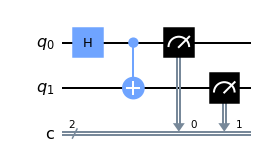

In [86]:
circB.draw('mpl')

In [93]:
measures = []
for j in range(0, 10):
    outcome = execute(circB, backend).result()
    hist = outcome.get_counts()
    for i in hist.keys():
        measures.append(i)
measures

['00', '00', '11', '11', '11', '00', '00', '11', '00', '11']